In [1]:
#!pip install unidecode

### Data Import

In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import unidecode # Used for text processing, possibly for cleaning the data

# Ensure good visual aesthetics
sns.set(font_scale=1.2)

In [3]:
# Read the CSV file containing electricity consumption data
df_cons = pd.read_csv( "cons_elec_france.csv" )

In [4]:
# Display the first few rows of the data
df_cons.head()

,2015-11-13;Entreprises;13882225479
0,2015-11-11;Professionnels;3746294820
1,2015-12-18;Professionnels;5523363437
2,2015-12-06;Résidentiels;22545973870
3,2015-10-30;Résidentiels;15903891494
4,2015-10-20;Entreprises;14862039750


In [5]:
type(df_cons)

pandas.core.frame.DataFrame

We begin by importing the required libraries, including `pandas` for data manipulation, `seaborn` and `matplotlib` for visualizations, and `unidecode` for any necessary text cleaning. We then load the `cons_elec_france.csv` file into a Pandas dataframe `df_cons`.

#### Dataset Overview:
- **Date**: The date of the electricity consumption data.
- **Customer Type**: The category of electricity consumer (e.g., `Entreprises`, `Professionnels`, `Résidentiels`).
- **Electricity Consumption**: The amount of electricity consumed in some unit.

### Data Preprocessing
Next, we check for missing values in the dataset. In this case, we drop any rows with missing data. Alternatively, we could fill the missing values with a default value (e.g., the mean). This step ensures that the data is clean before performing any analysis or visualization.

In [6]:
# Some information about the dataframe
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   2015-11-13;Entreprises;13882225479  7303 non-null   object
dtypes: object(1)
memory usage: 57.2+ KB


In [7]:
# The colNames which needs focus are been called
colNames=["date", "client_category", "daily_consumption"]
df_cons = pd.read_csv( "cons_elec_france.csv", sep=";", names=colNames )

In [8]:
# Check for missing data
df_cons.isnull().sum()

# Handle missing data (if any)
# If missing data is found, fill or drop rows/columns accordingly
df_cons = df_cons.dropna()  # Example: Dropping rows with missing data

In [9]:
# Display the first lines of df_cons
df_cons.head()

,date,client_category,daily_consumption
0,2015-11-13,Entreprises,13882225479
1,2015-11-11,Professionnels,3746294820
2,2015-12-18,Professionnels,5523363437
3,2015-12-06,Résidentiels,22545973870
4,2015-10-30,Résidentiels,15903891494


In [10]:
# Finding out information about the data
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               7304 non-null   object
 1   client_category    7304 non-null   object
 2   daily_consumption  7304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 171.3+ KB


You should see somthing like this : \
\
date &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  object \
client_category   &emsp;&emsp;&emsp;&emsp;&nbsp; object \
daily_consumption   &emsp;&emsp;&emsp;  int64 \
dtype: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  object \
\
object type is a global type that means anything that we can assign to a variable in Python. Some exmple types are numbers (integers, floating-point and complex numbers), booleans, the “null” type, strings, lists, dicts, nested objects etc.\
Here Python has assigned int type to daily_consumption but it did not identify any particular type for other columns. We can ask Python to cast the types.  

In [11]:
# How many columns are in df_cons
df_cons.columns

Index(['date', 'client_category', 'daily_consumption'], dtype='object')

In [12]:
# We introduce (.loc) to access the contents of rows and columns
df_cons.loc[0, :]

date                  2015-11-13
client_category      Entreprises
daily_consumption    13882225479
Name: 0, dtype: object

In [13]:
# We introduce (.loc) to access the contents of "date" & "client_category" columns
df_cons.loc[2:3, ["date", "client_category"] ]

,date,client_category
2,2015-12-18,Professionnels
3,2015-12-06,Résidentiels


In [14]:
# type is used to check the data type of an object or class
type(df_cons.columns)

pandas.core.indexes.base.Index

In [15]:
# confirming the information we have on the data
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               7304 non-null   object
 1   client_category    7304 non-null   object
 2   daily_consumption  7304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 171.3+ KB


In [16]:
## datetime conversion
# We convert because date often comes as strings and we need to 
# python to understand, compare and manipulate date and time correctly.
# The code might fail if formatted differently
df_cons["date"] = pd.to_datetime(df_cons["date"], 
                                 format="%Y-%m-%d", 
                                 errors="coerce")
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               7304 non-null   datetime64[ns]
 1   client_category    7304 non-null   object        
 2   daily_consumption  7304 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 171.3+ KB


In [17]:
## float conversion
# To perform decimal or precise calculations
# If data includes fraction, percentages, prices, or measurement
# we need to convert a float otherwise an error will be shown 
df_cons["daily_consumption"] = \
    df_cons["daily_consumption"].astype(float)
df_cons.dtypes

date                 datetime64[ns]
client_category              object
daily_consumption           float64
dtype: object

In [18]:
# We check if there are redundant datas
## Drop the duplicated rows:
df_cons = df_cons.drop_duplicates()
duplicates_after = df_cons.duplicated().sum()
print(f"Number of duplicate rows after: {duplicates_after}")

Number of duplicate rows after: 0


In [19]:
# Check the shape from before if there are any changes 
df_cons.shape

(7304, 3)

In [20]:
# Check the length from before if there are any changes 
len(df_cons)

7304

In [21]:
# Describe method is used here to have some statistical info
# Generate summary statistics of the data and gives an overview
# of the main characteristics of each column
df_cons.describe()

,date,daily_consumption
count,7304,7.304000e+03
mean,2016-02-23 12:00:00.000000256,9.882748e+09
min,2013-08-25 00:00:00,2.812475e+09
25%,2014-11-24 00:00:00,4.720512e+09
50%,2016-02-23 12:00:00,8.149467e+09
75%,2017-05-25 00:00:00,1.401314e+10
max,2018-08-24 00:00:00,3.635733e+10
std,NaN,6.234929e+09


### Data Visualization
In this section, we visualize the distribution of electricity consumption across different customer types using a box plot. We also visualize the trend of electricity consumption over time with a line plot. This helps us understand the temporal and categorical patterns in the data.

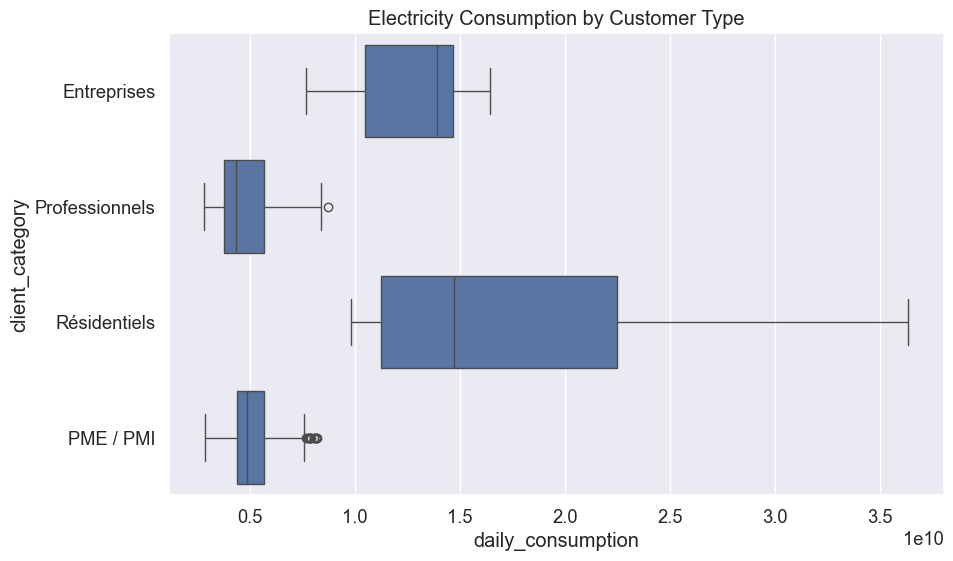

In [22]:
# Boxplot is a powerfull tool to illustraues the outliers. 
# Look for on-line documention on boxplots.
fig, ax = plt.subplots( figsize=(10, 6) )
sns.boxplot( data=df_cons, x="daily_consumption", y="client_category")
plt.title('Electricity Consumption by Customer Type')
plt.show()

In [23]:
# Visualizing the trend of electricity consumption over time
df_cons['date'] = pd.to_datetime(df_cons['date'])
df_cons.sort_values('date', inplace=True)

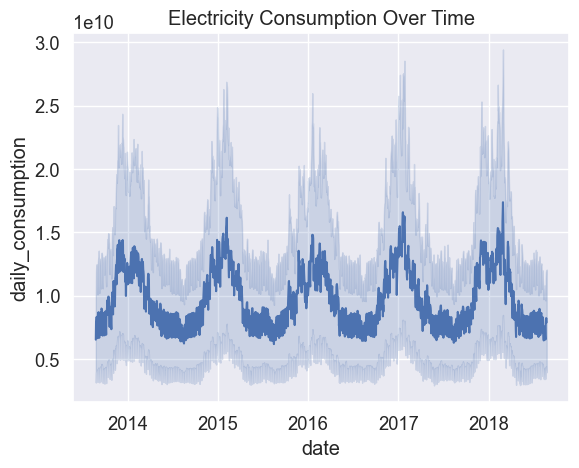

In [24]:
sns.lineplot(x='date', y='daily_consumption', data=df_cons)
plt.title('Electricity Consumption Over Time')
plt.show()

In [25]:
# This tells the time range of the data which is crucial
# for understanding, validating, and interpreting the analysis
# To check for missing periods or gaps
# To filter or align data
# To ensure data completeness and quality
# The (min) and (max) is to "understand the spread and scale of data", 
# "to detect errors and outliers"
min(df_cons['date']), max(df_cons['date'])

(Timestamp('2013-08-25 00:00:00'), Timestamp('2018-08-24 00:00:00'))

In [26]:
# help(df_cons.sort_values)

In [27]:
# Task : sort the df_cons by date by using sort_values method:

# We implement sorting here because we need to see patterns or trends easily
# To detect errors and anomally
df_cons = df_cons.sort_values(by='date', ignore_index=True)
df_cons

,date,client_category,daily_consumption
0,2013-08-25,Résidentiels,1.131514e+10
1,2013-08-25,Entreprises,8.385337e+09
2,2013-08-25,Professionnels,3.076408e+09
3,2013-08-25,PME / PMI,3.297476e+09
4,2013-08-26,Professionnels,3.568823e+09
...,...,...,...
7299,2018-08-23,PME / PMI,5.114309e+09
7300,2018-08-24,Professionnels,3.624391e+09
7301,2018-08-24,Résidentiels,1.038747e+10
7302,2018-08-24,PME / PMI,4.913384e+09


In [28]:
# Task : add a new column "year" to df_cons that contains 
#        the year for each entry.

# Extracting year from df_cons["date"] give us an extra column for the years seperately
df_cons["year"] = df_cons["date"].dt.year
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               7304 non-null   datetime64[ns]
 1   client_category    7304 non-null   object        
 2   daily_consumption  7304 non-null   float64       
 3   year               7304 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 199.8+ KB


In [29]:
# Checking the first five(5) information of the data again
df_cons.head()

,date,client_category,daily_consumption,year
0,2013-08-25,Résidentiels,1.131514e+10,2013
1,2013-08-25,Entreprises,8.385337e+09,2013
2,2013-08-25,Professionnels,3.076408e+09,2013
3,2013-08-25,PME / PMI,3.297476e+09,2013
4,2013-08-26,Professionnels,3.568823e+09,2013


In [30]:
# Task : find the unique categories in client_category 
#   columns by applying the unique() method.

# The [unique()] returns all the distinct (non-repetitive) values from a column
# We use it to undertsnad what categories exist
# To also detect inconsistencies or typos and check data quality and completeness
# To prepare for grouping and summarizing
df_cons["client_category"].unique()

array(['Résidentiels', 'Entreprises', 'Professionnels', 'PME / PMI'],
      dtype=object)

In [31]:
# The [.nunique()] deals with number of uniques columns we have present
df_cons["client_category"].nunique()

4

In [32]:
# Task : explain the following code :

# This converts all text in the "client_category" column to lowercase.
df_cons["client_category"] = df_cons["client_category"].str.lower()

# checking to see the highcase are gone
df_cons

,date,client_category,daily_consumption,year
0,2013-08-25,résidentiels,1.131514e+10,2013
1,2013-08-25,entreprises,8.385337e+09,2013
2,2013-08-25,professionnels,3.076408e+09,2013
3,2013-08-25,pme / pmi,3.297476e+09,2013
4,2013-08-26,professionnels,3.568823e+09,2013
...,...,...,...,...
7299,2018-08-23,pme / pmi,5.114309e+09,2018
7300,2018-08-24,professionnels,3.624391e+09,2018
7301,2018-08-24,résidentiels,1.038747e+10,2018
7302,2018-08-24,pme / pmi,4.913384e+09,2018


In [33]:
# Removing the accents from client_category column

# Since accents and special characters can cause mismatches
# we need to apply unidecode which we mentioned from the beginnig
df_cons["client_category"] = df_cons["client_category"].apply(unidecode.unidecode)

In [34]:
# checking to see the accents are gone
df_cons.tail()

,date,client_category,daily_consumption,year
7299,2018-08-23,pme / pmi,5.114309e+09,2018
7300,2018-08-24,professionnels,3.624391e+09,2018
7301,2018-08-24,residentiels,1.038747e+10,2018
7302,2018-08-24,pme / pmi,4.913384e+09,2018
7303,2018-08-24,entreprises,1.261049e+10,2018


In [35]:
# Mean consumption per client category
# Task : explain the following code line by line :
df_cl_cons = df_cons[["daily_consumption", "client_category"]]\
    .groupby( "client_category" )\
    .mean()\
    .reset_index()\
    .sort_values("daily_consumption")\
    .rename( columns={"daily_consumption" : "mean_daily_consumption"} )

# line 1: Selects two columns from the original df 
# and creates a new one for focused analysis

# line 2: Groups the data by unique values in the client_category column

# line 3: Computes the average (mean) of daily_consumption
# for each client category group

# line 4: reset_index() converts the index back to a regular column

# line 5: Sorts the resulting df by the daily_consumption column in ascending order

# line 6: Renames the column for clarity sake

In [36]:
df_cl_cons

,client_category,mean_daily_consumption
2,professionnels,4.737157e+09
1,pme / pmi,4.999475e+09
0,entreprises,1.286533e+10
3,residentiels,1.692903e+10


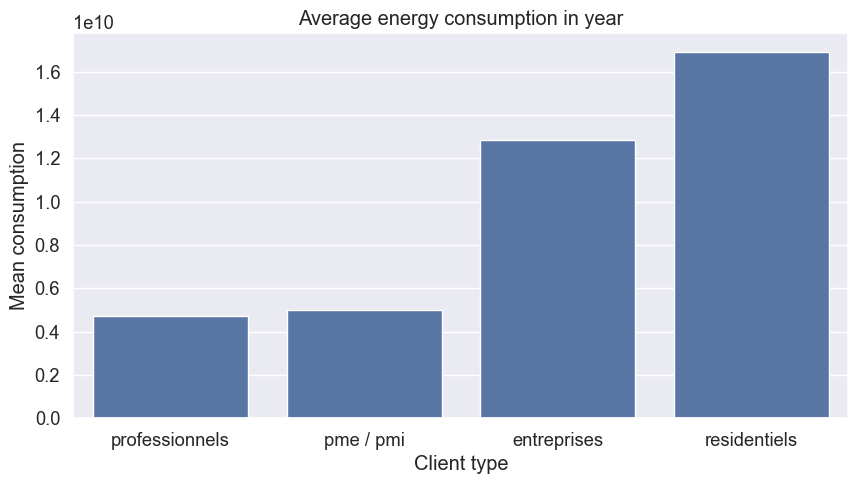

In [37]:
# Task : run and explain the following code :
fig, axs = plt.subplots( figsize=(10, 5) )
sns.barplot( data=df_cl_cons, x="client_category", 
             y="mean_daily_consumption" )
plt.title( "Average energy consumption in year" )
plt.xlabel("Client type")
plt.ylabel("Mean consumption")
plt.show()

In [38]:
# Task : compute the total energy consumption per year per different 
#        client category
# Hint : use groupby method to regroup the df_cons by year and 
#        client_category and then sum on daily_consumption.  
#        date column should not be included in groupby.

# This code calculates the total yearly energy consumption for each type of client
# The [.drop()] "date" column is removed since we do not need them; just the year is needed
# The [.groupby()] groups the data by client type with yearly consumption
# The [.sum()] makes an aggregate of daily consumption
# rename changes the column names from "daily_consumption" to "sum_daily_consumption"
# The [inplace=True] modifies the original DataFrame directly 

df_year_cat = df_cons.drop("date", axis=1).groupby(["client_category","year"]).sum().reset_index()
df_year_cat.rename(columns={"daily_consumption":"sum_daily_consumption"}, inplace=True)
df_year_cat

,client_category,year,sum_daily_consumption
0,entreprises,2013,1.702219e+12
1,entreprises,2014,4.702533e+12
2,entreprises,2015,4.732596e+12
3,entreprises,2016,4.670841e+12
4,entreprises,2017,4.666836e+12
5,entreprises,2018,3.017074e+12
6,pme / pmi,2013,6.290443e+11
7,pme / pmi,2014,1.707706e+12
8,pme / pmi,2015,1.771248e+12
9,pme / pmi,2016,1.875980e+12


In [39]:
# Task : Display the df_year_cons dataframe :

# "df_year_cons" has never been declared
# when runned, it give a "NameError"

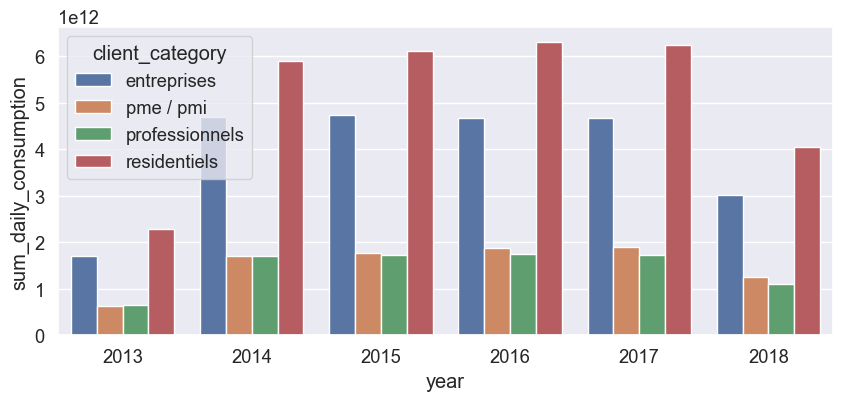

In [40]:
# Plotting total consumption for different years and different 
#  client categories
fig, ax = plt.subplots( figsize=(10, 4) )
sns.barplot(x="year", y="sum_daily_consumption", hue="client_category",
               data=df_year_cat)
plt.show()
#Question : what is the role of hue parameter in catplot?
# The role of the hue parameter is to seperate data into groups using color
# Since hue is applied to client category, it seperates the data by color

In [41]:
# Task : From df_cons select data for 2016 with "residentiels" and 
#        "entreprises" as clients. Make a lineplot for  
#        daily_consumption versus date for the two different 
#        client categoris.

# Filter data for year 2016 and specific client categories
df_2016 = df_cons[(df_cons["year"]==2016) & df_cons["client_category"].isin(["residentiels", "entreprises"])]

# Remove the 'year' column since we're only looking at 2016 data now
# this reduces redundancy and prepares data for plotting
df_2016 = df_2016.drop("year", axis=1)

# Display the first few rows
df_2016.head()

,date,client_category,daily_consumption
3436,2016-01-01,residentiels,2.246675e+10
3439,2016-01-01,entreprises,8.914158e+09
3440,2016-01-02,entreprises,9.076890e+09
3443,2016-01-02,residentiels,2.267567e+10
3445,2016-01-03,residentiels,2.430081e+10


In [42]:
df_2016

,date,client_category,daily_consumption
3436,2016-01-01,residentiels,2.246675e+10
3439,2016-01-01,entreprises,8.914158e+09
3440,2016-01-02,entreprises,9.076890e+09
3443,2016-01-02,residentiels,2.267567e+10
3445,2016-01-03,residentiels,2.430081e+10
...,...,...,...
4889,2016-12-29,residentiels,2.810850e+10
4893,2016-12-30,residentiels,2.953882e+10
4895,2016-12-30,entreprises,1.174681e+10
4896,2016-12-31,entreprises,9.705998e+09


In [43]:
# checking the shape of the data
df_2016.shape

(732, 3)

<Axes: xlabel='date', ylabel='daily_consumption'>

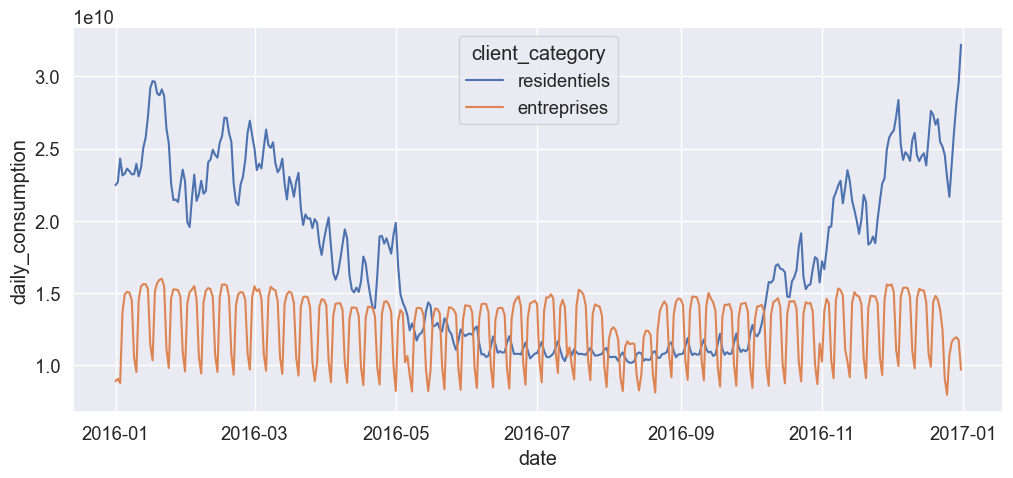

In [44]:
fig, ax = plt.subplots( figsize=(12, 5) )

sns.lineplot(data=df_2016, x="date", y="daily_consumption", hue="client_category")

In [45]:
# Question : Interpret the previous plot. 
#            Why the plots varies by time for residentials ?
#            Why for enterprises the plot is comb-like ? 

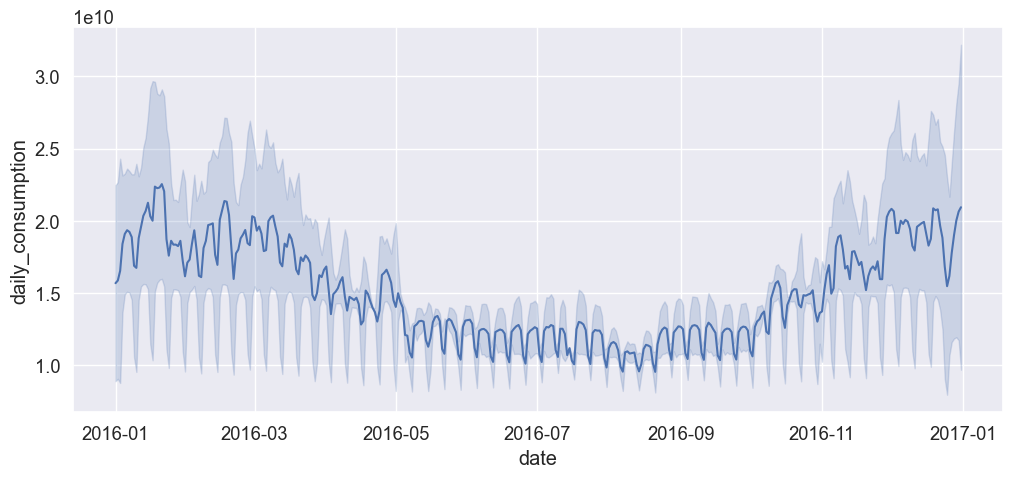

In [46]:
# Task : Replot the previous task without using the hue parameter and 
#        explain the difference.
fig, ax = plt.subplots( figsize=(12, 5) )
sns.lineplot(data=df_2016, x="date", y="daily_consumption")
plt.show()

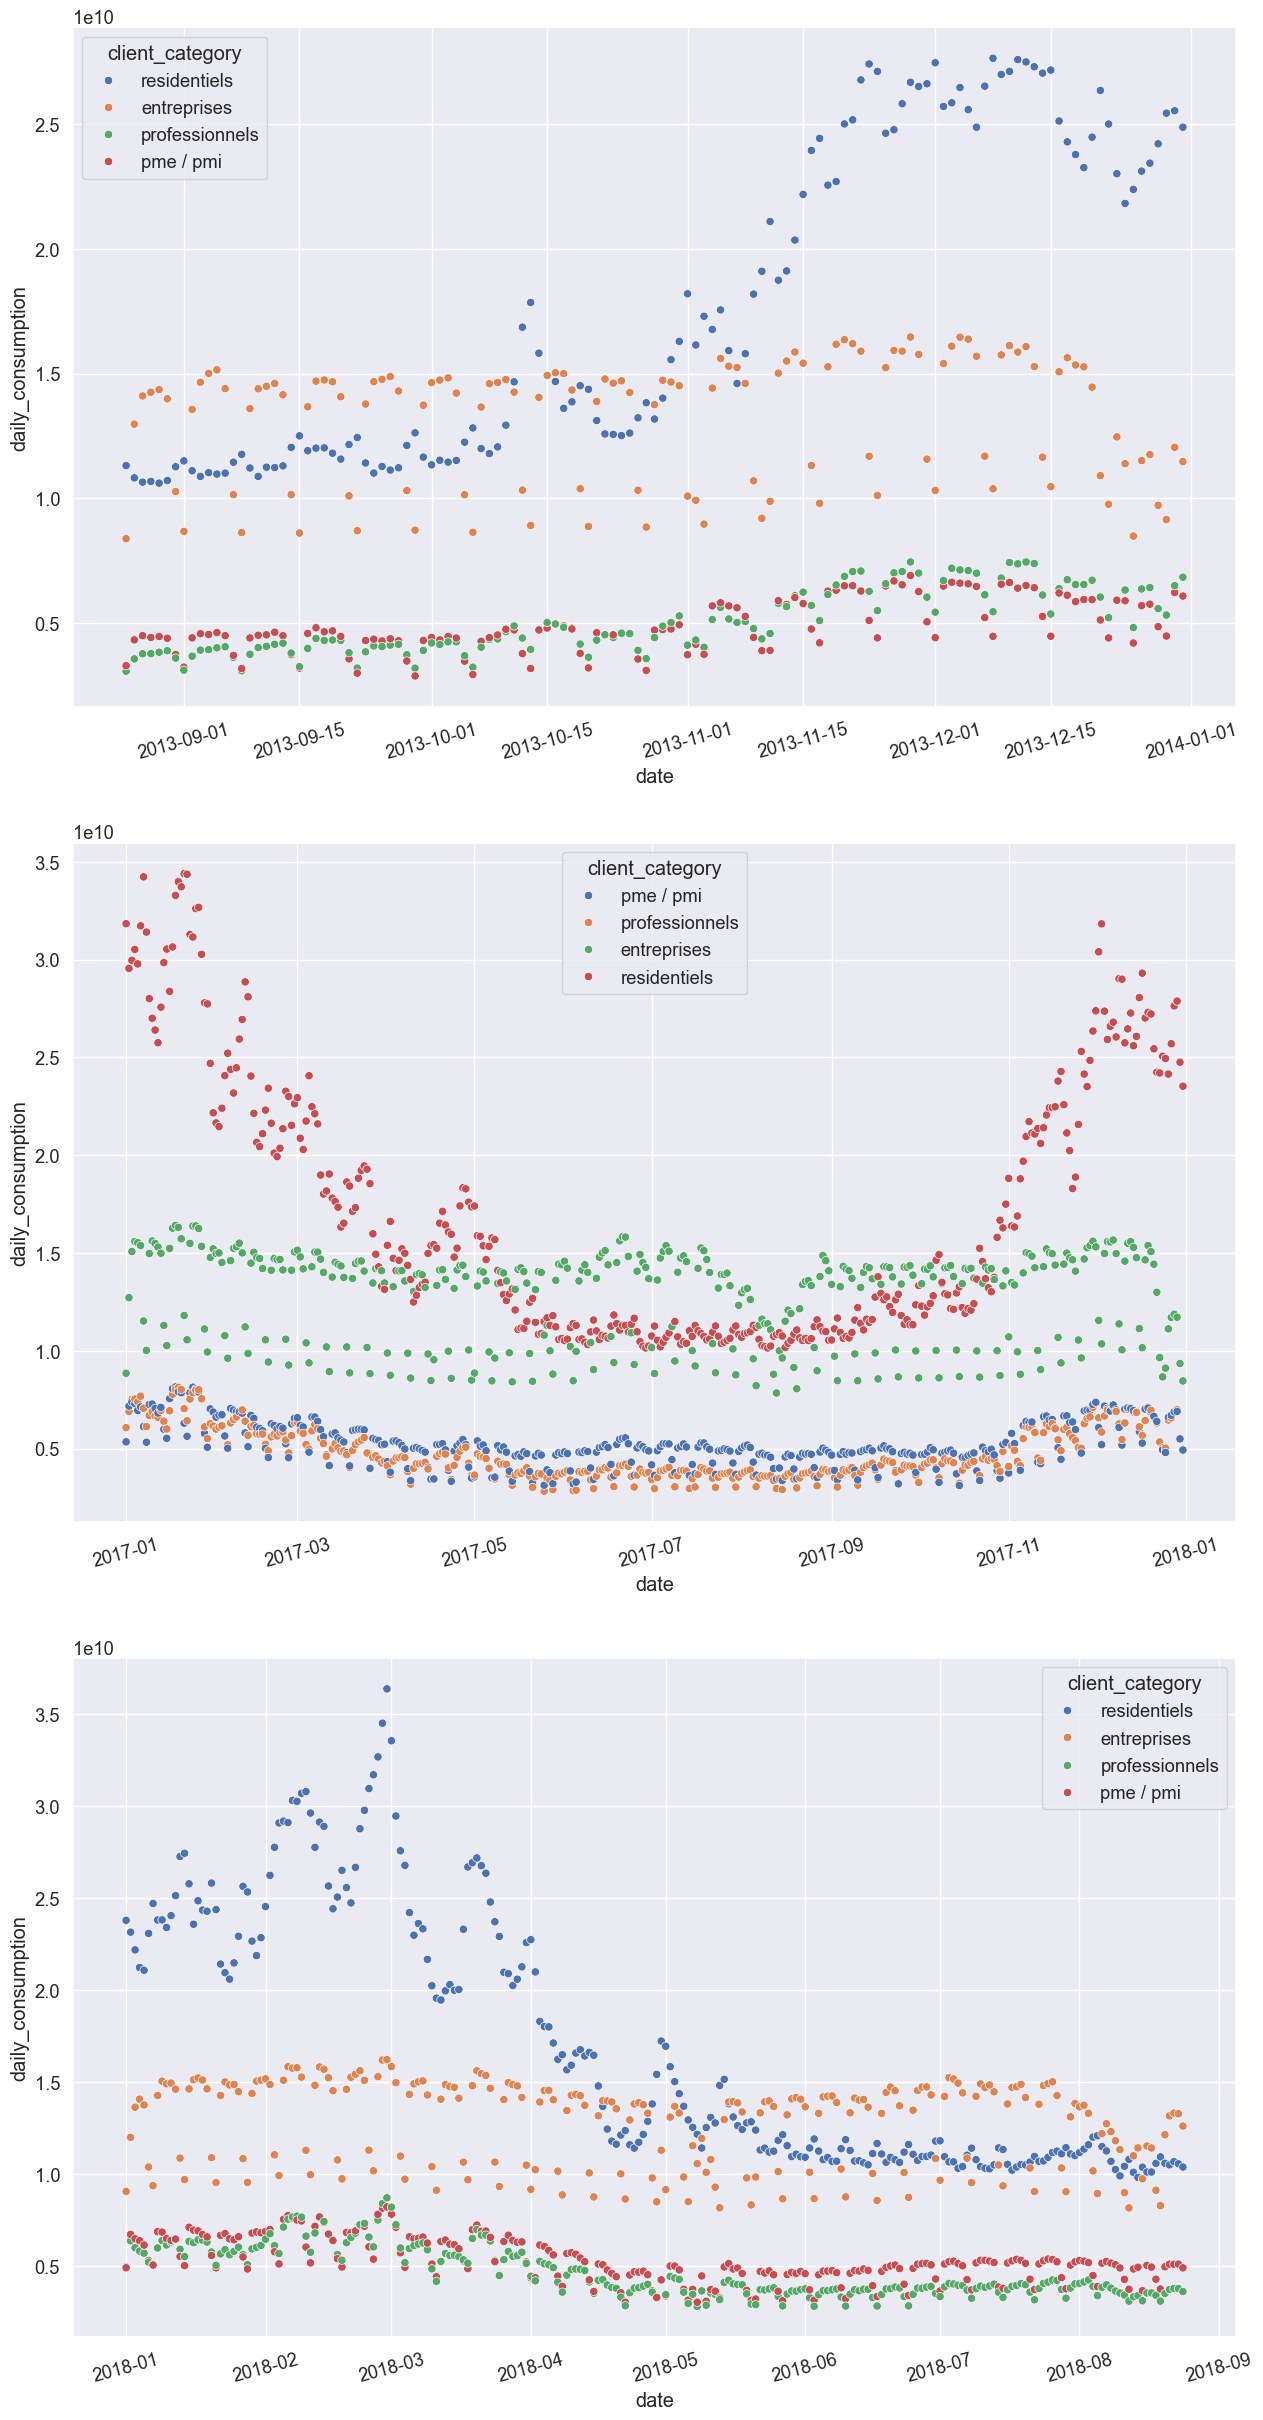

In [47]:
# Task : Explaine the following code :
fig, axs = plt.subplots( 3,1, figsize=(15, 30) )
for i, y in enumerate( [2013, 2017, 2018] ) :
    sns.scatterplot( data=df_cons[df_cons["year"]==y], 
                     x="date", y="daily_consumption", 
                     hue="client_category",ax=axs[i] )
    axs[i].tick_params(axis='x', rotation=15)


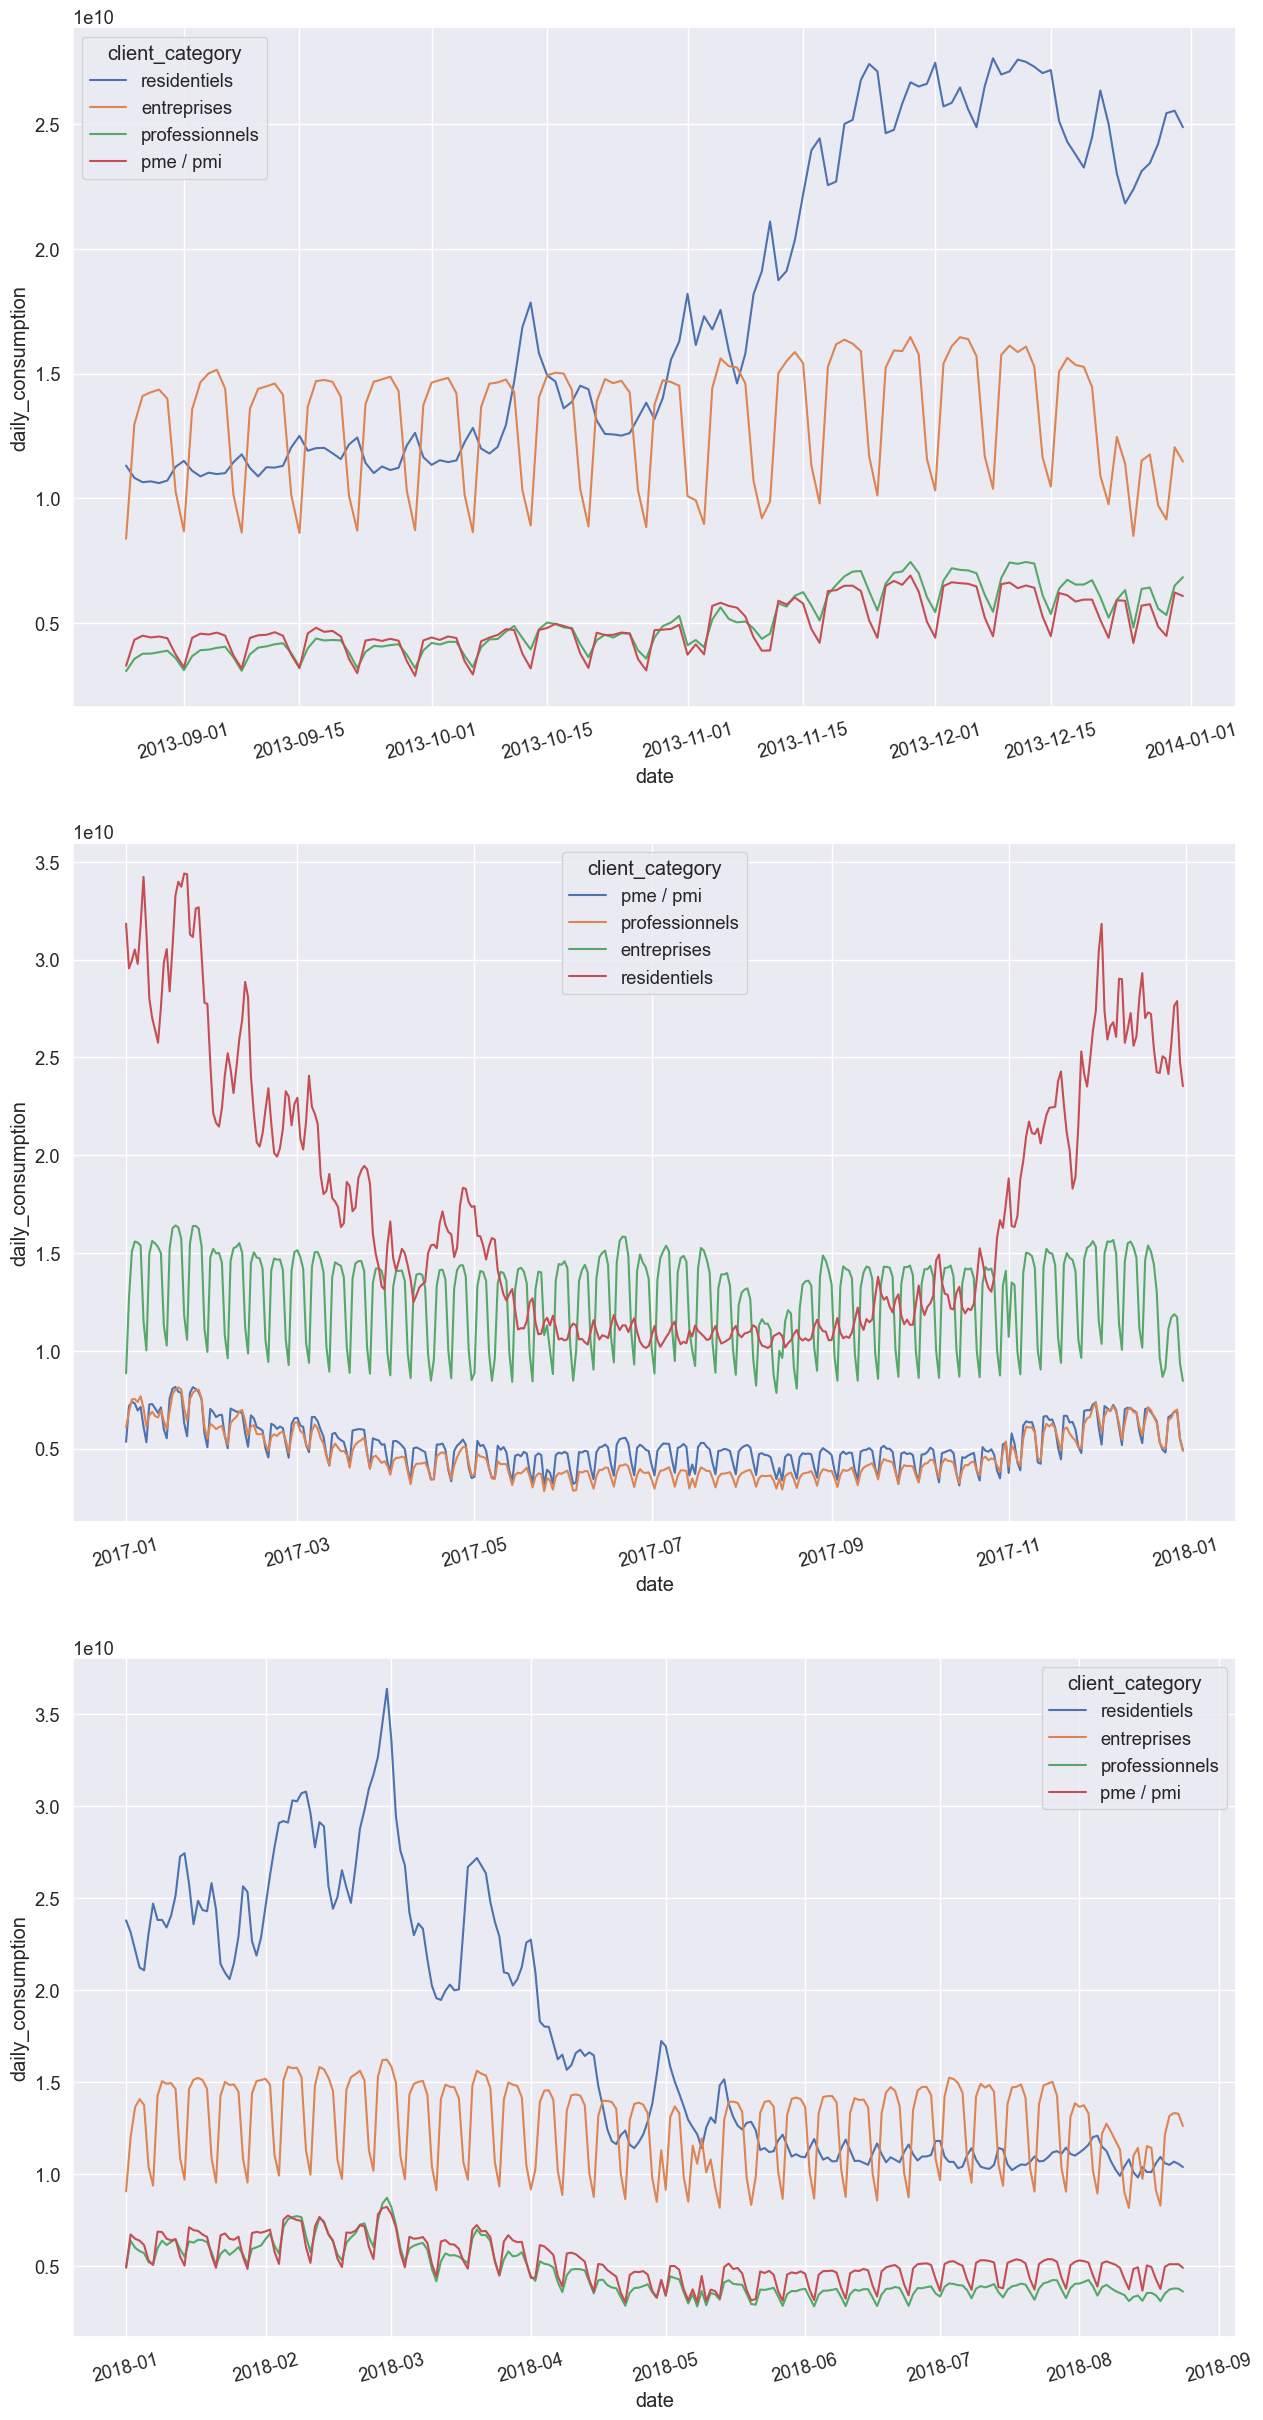

In [48]:
# Task : Explaine the following code :
fig, axs = plt.subplots( 3,1, figsize=(15, 30) )
for i, y in enumerate( [2013, 2017, 2018] ) :
    sns.lineplot( data=df_cons[df_cons["year"]==y], 
                     x="date", y="daily_consumption", 
                     hue="client_category",ax=axs[i] )
    axs[i].tick_params(axis='x', rotation=15)


### Exercises 
**groupby followed by multiple aggregation** 
* Regroup the df_cons dataframe by client_category and year then find a method that make a sum over daily_consumption and count on date. Sort the regrouped dataframe by daily_consumption and rename the columns as : "client_category", "year", "yearly_consumption" and "n_days". 
* Display the regrouped dataframe. 
* Make a barplot that shows the some of yearly_consumption versus n_days for different client categories.

In [49]:
# Create a new dataframe 'df_yearly' by grouping and summarizing data

df_yearly = (
    df_cons
    .groupby(['client_category', 'year'])  # Group the data by client type and year
    .agg({                            # Apply multiple aggregation functions at once
        'daily_consumption': 'sum',   # yearly total consumption
        'date': 'count'               # number of days recorded
    })
    .rename(columns={
        'daily_consumption': 'annual_consumption',  # rename for clarity
        'date': 'n_days'     # new  name for number of  days
    })
    .reset_index()     # reset index to turn grouped columns into normal columns
)


#show the header
df_yearly.head()

,client_category,year,annual_consumption,n_days
0,entreprises,2013,1.702219e+12,129
1,entreprises,2014,4.702533e+12,365
2,entreprises,2015,4.732596e+12,365
3,entreprises,2016,4.670841e+12,366
4,entreprises,2017,4.666836e+12,365


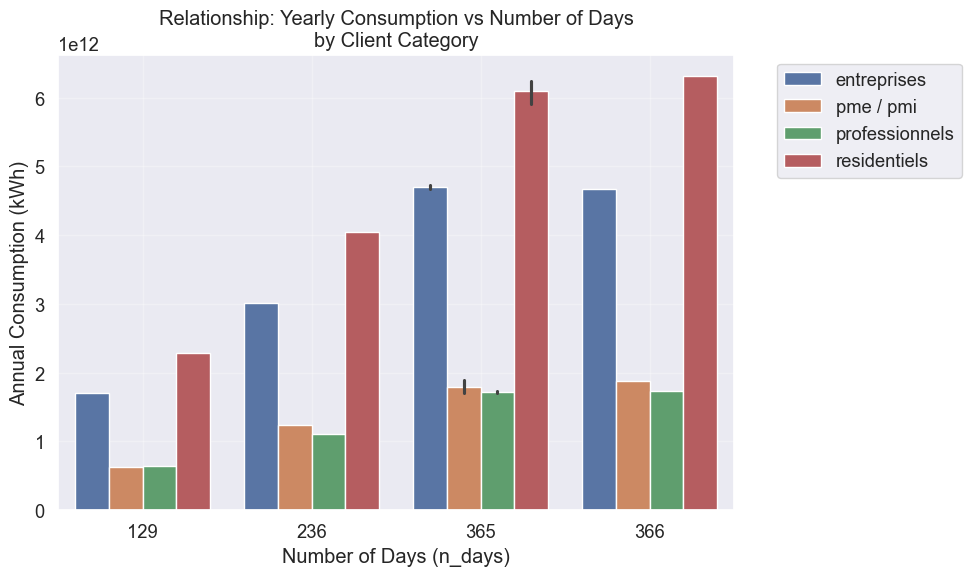

In [50]:
# Make a barplot that shows the sum of yearly_consumption
# versus n_days for different client categories.
# If the instruction meant a scatter plot of yearly_consumption versus n_days:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_yearly, 
                x='n_days', 
                y='annual_consumption', 
                hue='client_category',
                )

# Give the plot a significant 'Title'
plt.title('Relationship: Yearly Consumption vs Number of Days\nby Client Category')
# we then labeled the x axis by what it represents
plt.xlabel('Number of Days (n_days)')
# we then labeled the y axis by what it represents
plt.ylabel('Annual Consumption (kWh)')
plt.grid(True, alpha=0.3)

# Move legend outside the plot (right side)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()   # then we display our plot
plt.show()

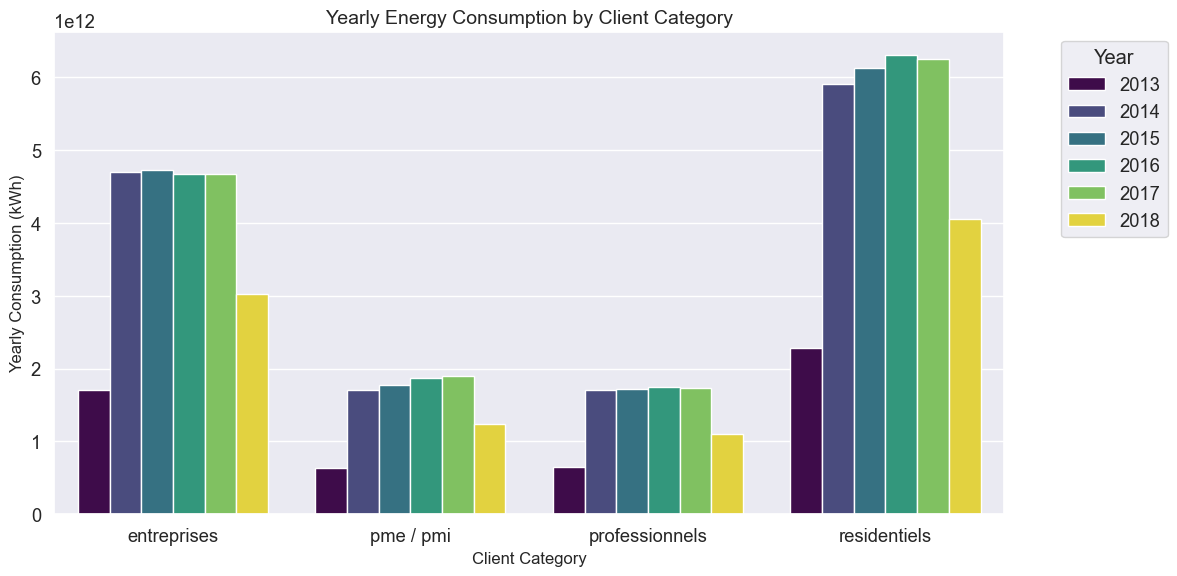

In [51]:
#  group by client category and year, summing daily consumption values
# This creates a new DataFrame showing total yearly consumption for each client type per year
df_new = df_cons.groupby(["client_category", "year"], as_index=False)["daily_consumption"].sum()
df_new = df_new.rename(columns={"daily_consumption": "yearly_consumption"})

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_new,                     #dataframe
    x="client_category",             # X-axis= client type
    y="yearly_consumption",          # Y-axis= total yearly consumption
    hue="year",                      #  different color shows different year
    palette="viridis"
)

plt.title("Yearly Energy Consumption by Client Category", fontsize=14) #chart title
plt.xlabel("Client Category", fontsize=12)  #label for x_axis
plt.ylabel("Yearly Consumption (kWh)", fontsize=12) # label for Y-axis
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")

# add and customize the legend (color guide
# Title displayed above the legend
# Position the legend slightly outside the chart (right side)
# Anchor point for legend position
plt.tight_layout() # Adjust layout to avoid overlapping elements
plt.show()# show

**Mean consumption per weekdays**
* From df_cons select data for 2017 and residential category. Extract the week day names from the date column. Compute the mean consumption per day. 
* Make lineplot for mean consumption versus week day. 
* How do you interpret the plot ? 

In [52]:
# select only data fram from 2017 for residential clients
df_2017 = df_cons[
    (df_cons["year"] == 2017) &
    (df_cons["client_category"] == "residentiels")
].copy() # we filter our data here (we want year=2017 , client=residentiels,copy()= create separate copy for filter data
df_2017.head()

,date,client_category,daily_consumption,year
4903,2017-01-01,residentiels,3.183988e+10,2017
4907,2017-01-02,residentiels,2.955506e+10,2017
4911,2017-01-03,residentiels,2.996696e+10,2017
4912,2017-01-04,residentiels,3.052323e+10,2017
4918,2017-01-05,residentiels,2.978392e+10,2017


In [53]:
df_2017["weekday"] = df_2017["date"].dt.day_name() # extract the name of the day from data

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] #define the logical order of weekday 

# Convert weekday column to categorical type and sort
df_2017["weekday"] = pd.Categorical(df_2017["weekday"], categories=weekday_order, ordered=True)# Convert the 'weekday' column into a categorical type with a defined order.
df_2017 = df_2017.sort_values("weekday")

In [54]:
#compute the (mean) electricity consumption for each day of the week.

mean_daily = (
    df_2017
    .groupby("weekday", observed=True)["daily_consumption"]  # group the data by weekday
    .mean()                                        # calculate the mean daily consumption 
    .reset_index()                                 # turn the grouped index back into regular columns
)



mean_daily.head() # display fist rows

,weekday,daily_consumption
0,Monday,1.698429e+10
1,Tuesday,1.661305e+10
2,Wednesday,1.689248e+10
3,Thursday,1.668341e+10
4,Friday,1.678021e+10


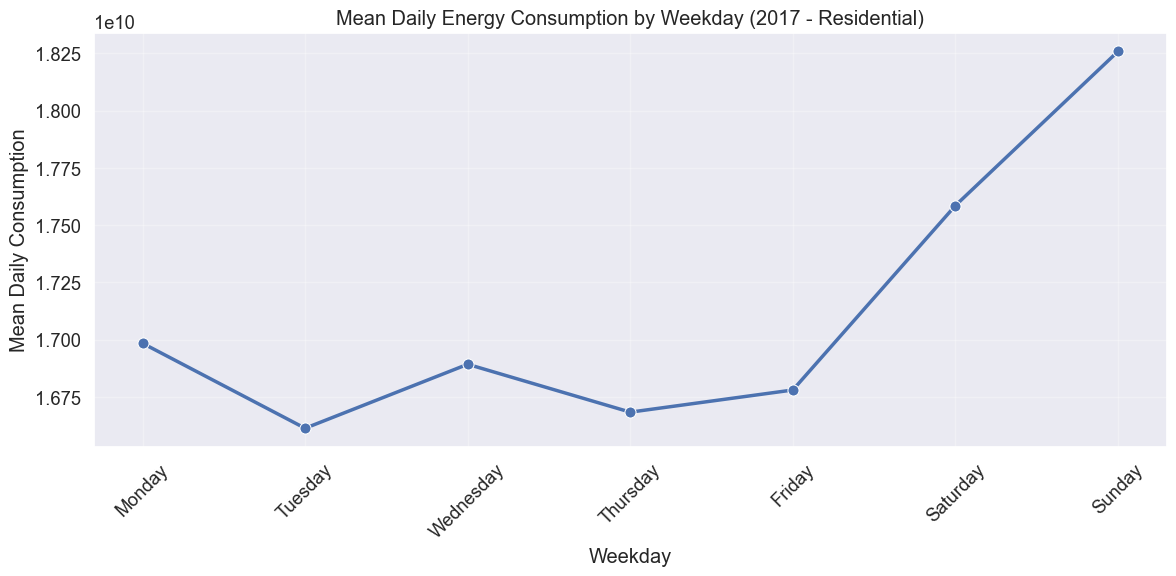

In [55]:
# Create lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_daily, 
             x='weekday', 
             y='daily_consumption', 
             marker='o',
             linewidth=2.5,
             markersize=8)

# Customize the plot appearance
plt.title('Mean Daily Energy Consumption by Weekday (2017 - Residential)')
plt.xlabel('Weekday')
plt.ylabel('Mean Daily Consumption')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## How do we interpret the plot?

The line plot shows how residential energy consumption changes throughout the week in 2017.
The pattern tells us:
- Energy use is relatively lower and stable on weekdays
- Energy use significantly increases on weekends
- There's a clear weekly cycle as energy use gradually increases as the week progresses
In conclusion, the graph clearly shows that residential energy consumption follows a weekly pattern with lowest usage during weekdays and highest usage on weekends, particularly Sundays, when people are home and engaged in household activities.

### Clustering Electricity Consumption
Here, we apply **K-Means clustering** to group data points based on their electricity consumption. We choose `n_clusters=3` for simplicity, but this number can be adjusted based on the **Elbow method** or other clustering criteria. The scatter plot shows how the data points are grouped into different clusters.

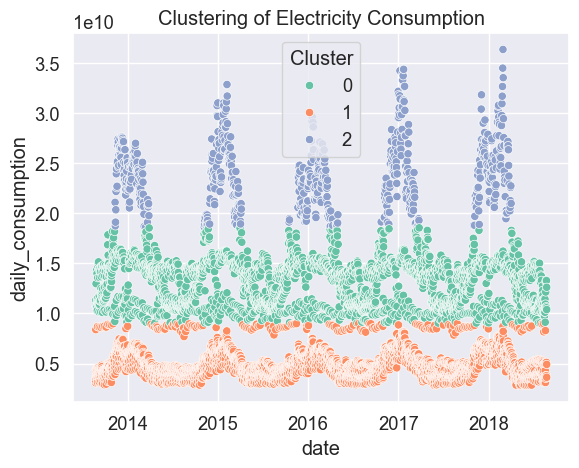

In [56]:
# Creating clusters using KMeans (if you are interested in clustering)
from sklearn.cluster import KMeans

# For example, we cluster based on `Electricity Consumption` and `Customer Type`
kmeans = KMeans(n_clusters=3)
df_cons['Cluster'] = kmeans.fit_predict(df_cons[['daily_consumption']])

# Plot the clusters
sns.scatterplot(x='date', y='daily_consumption', hue='Cluster', data=df_cons, palette='Set2')
plt.title('Clustering of Electricity Consumption')
plt.show()
